Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [18]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.regularizers import l2

In [19]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [21]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/MyDrive/skin-sample-images/Train/")
data_dir_test = pathlib.Path("/content/drive/MyDrive/skin-sample-images/Test/")

In [22]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2279
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [23]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [24]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = image_dataset_from_directory(
    data_dir_train,
    labels="inferred",
    label_mode = "int",
    color_mode = "rgb",
    batch_size = 32,
    image_size = (180,180),
    shuffle = True,
    validation_split = None,
    seed=123
)

Found 2279 files belonging to 9 classes.


In [25]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory(
    data_dir_test,
    labels = "inferred",
    label_mode = "int",
    color_mode = "rgb",
    batch_size = 32,
    image_size = (180, 180),
    shuffle = True,
    validation_split = False,
    seed=123
)

Found 118 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic-keratosis', 'basal-cell-carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented-benign-keratosis', 'seborrheic-keratosis', 'squamous-cell-carcinoma', 'vascular-lesion']


### Visualize the data
#### Visualize one instance of all the nine classes present in the dataset

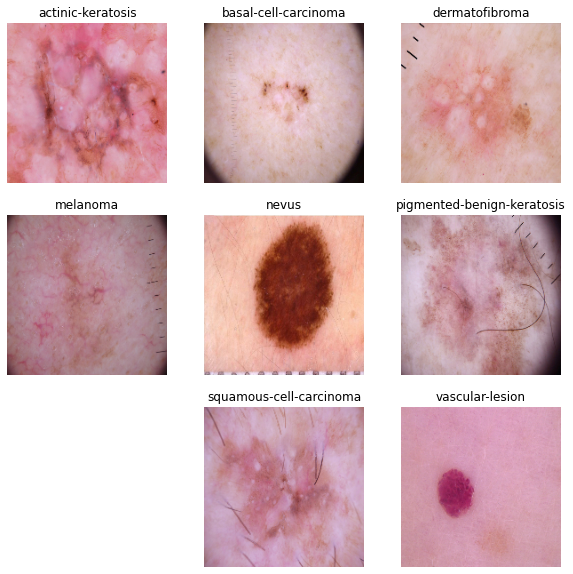

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [1]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

NameError: ignored

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
model = Sequential()
model.add(Rescaling(1.0/255, input_shape = (180,180,3)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(4096,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))




### Compile the model
#### optimiser = adam
#### loss function = sparse_categorical_crossentropy

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [ ]:
# View the summary of all layers
model.summary()

### Train the model
#### epochs = 20

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
72/72 [==============================] - 126s 306ms/step - loss: 23.0372 - accuracy: 0.3638 - val_loss: 16.8378 - val_accuracy: 0.1356
Epoch 2/20
72/72 [==============================] - 3s 43ms/step - loss: 10.0894 - accuracy: 0.5015 - val_loss: 10.5179 - val_accuracy: 0.1441
Epoch 3/20
72/72 [==============================] - 3s 41ms/step - loss: 5.0876 - accuracy: 0.5217 - val_loss: 6.8042 - val_accuracy: 0.1441
Epoch 4/20
72/72 [==============================] - 3s 45ms/step - loss: 3.0327 - accuracy: 0.5665 - val_loss: 4.8589 - val_accuracy: 0.1780
Epoch 5/20
72/72 [==============================] - 3s 44ms/step - loss: 2.2917 - accuracy: 0.5867 - val_loss: 3.9595 - val_accuracy: 0.1864
Epoch 6/20
72/72 [==============================] - 3s 44ms/step - loss: 1.9221 - accuracy: 0.6143 - val_loss: 3.5549 - val_accuracy: 0.2797
Epoch 7/20
72/72 [==============================] - 3s 44ms/step - loss: 1.7749 - accuracy: 0.6253 - val_loss: 3.1531 - val_accuracy: 0.3559
Epoch 

### Visualizing training results

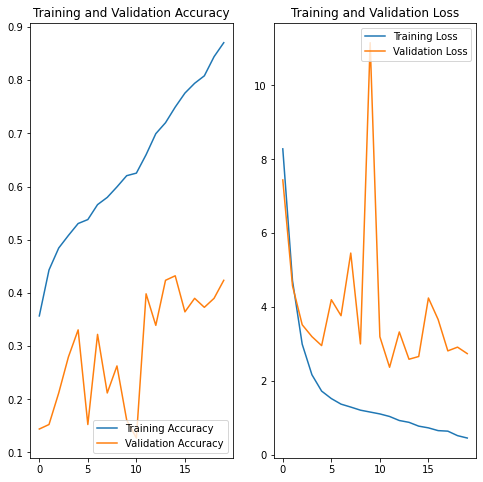

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here

 

1. Training accuracy is arround 87% and validation accuracy is arround 43%, it is a clear sign of overfitting.
2. Primary reason for overfitting is not having enough data for model training.

**Solution:** Data augmentation can help to replicate the existing data thus increasing number of training data

Data Augmentation strategy
1. Horizontal rotation
2. Random rotation
3. Random zoom 

In [26]:

data_augmentation = Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

### Visualize augmented images

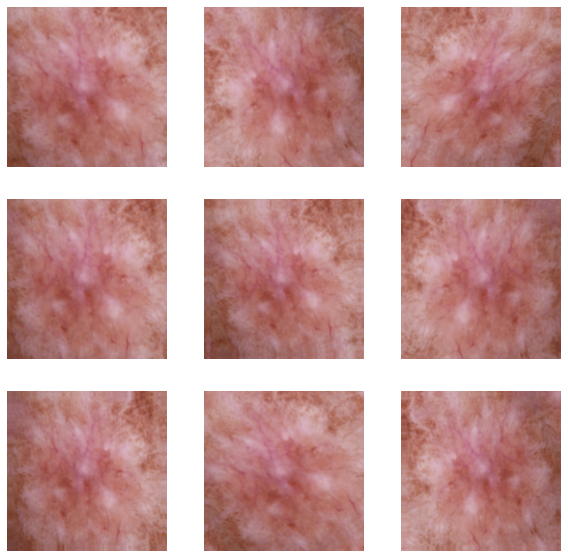

In [27]:
plt.figure(figsize=(10, 10))
for images, _ in val_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Create the model, compile and train the model


In [28]:
# Add dropout layer avoid overfitting

model = Sequential()
model.add(Rescaling(1.0/255, input_shape = (180,180,3)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(4096,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))



### Compiling the model

In [29]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

### Training the model

In [30]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


72/72 [==============================] - 28s 292ms/step - loss: 3.8210 - accuracy: 0.3734 - val_loss: 3.7342 - val_accuracy: 0.1356
Epoch 2/20
72/72 [==============================] - 21s 266ms/step - loss: 2.7997 - accuracy: 0.4467 - val_loss: 3.1571 - val_accuracy: 0.1356
Epoch 3/20
72/72 [==============================] - 22s 279ms/step - loss: 2.2633 - accuracy: 0.4774 - val_loss: 2.8975 - val_accuracy: 0.1525
Epoch 4/20
72/72 [==============================] - 21s 271ms/step - loss: 1.8944 - accuracy: 0.5169 - val_loss: 2.5902 - val_accuracy: 0.2797
Epoch 5/20
72/72 [==============================] - 22s 265ms/step - loss: 1.6752 - accuracy: 0.5279 - val_loss: 2.7035 - val_accuracy: 0.2288
Epoch 6/20
72/72 [==============================] - 22s 288ms/step - loss: 1.5361 - accuracy: 0.5445 - val_loss: 3.0519 - val_accuracy: 0.3136
Epoch 7/20
72/72 [==============================] - 21s 266ms/step - loss: 1.4373 - accuracy: 0.5459 - val_loss: 2.5717 - val_accuracy: 0.2373
Epoch 8/20

Epoch 20/20
72/72 [==============================] - 16s 226ms/step - loss: 1.0852 - accuracy: 0.6700 - val_loss: 2.8144 - val_accuracy: 0.4153

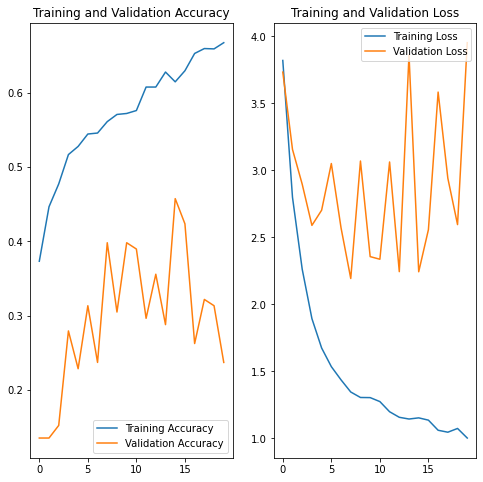

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Visualizing the results

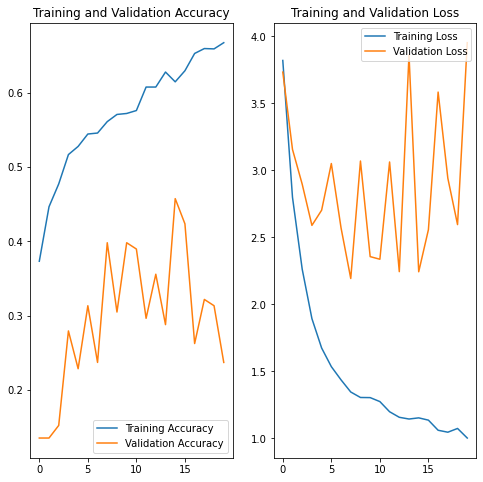

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

* Even after image augmentation and increasing total number of images there is no significant improvement in model performance.
* Model is still overfitting on the training data

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

In [33]:
dataset_unbatched = tuple(train_ds.unbatch())
labels = []
for (image,label) in dataset_unbatched:
    labels.append(label.numpy())

labels = pd.DataFrame(labels)

# adjustments
count = labels.value_counts().sort_index()
count.index = class_names
count.index
count.values

count_df = pd.DataFrame({"class": class_names, "count": count.values})
count_df

,class,count
0,actinic-keratosis,114
1,basal-cell-carcinoma,396
2,dermatofibroma,95
3,melanoma,438
4,nevus,367
5,pigmented-benign-keratosis,462
6,seborrheic-keratosis,77
7,squamous-cell-carcinoma,191
8,vascular-lesion,139


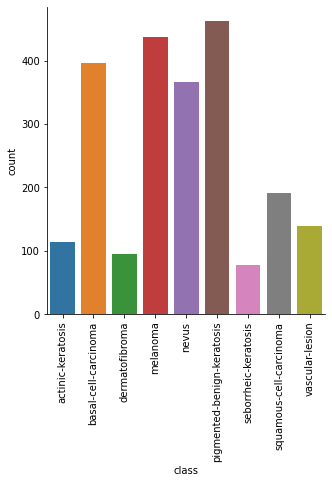

In [34]:
sns.catplot(data=count_df, x="class", y="count", kind="bar")
plt.xticks(rotation=90)
plt.show()

#### Write your findings here: 
#### - Which class has the least number of samples?
> Seborrheic Keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
> Pigmented benign keratosis


#### Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [35]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [36]:
path_to_training_dataset="/content/drive/MyDrive/skin-sample-images/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2279 image(s) found.
Output directory set to /content/drive/MyDrive/skin-sample-images/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE2015E6880>: 100%|██████████| 500/500 [00:49<00:00, 10.10 Samples/s]


Initialised with 2279 image(s) found.
Output directory set to /content/drive/MyDrive/skin-sample-images/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE20166B880>: 100%|██████████| 500/500 [00:42<00:00, 11.73 Samples/s]


Initialised with 2279 image(s) found.
Output directory set to /content/drive/MyDrive/skin-sample-images/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE2081559D0>: 100%|██████████| 500/500 [00:51<00:00,  9.71 Samples/s]


Initialised with 2279 image(s) found.
Output directory set to /content/drive/MyDrive/skin-sample-images/Train/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FE20BC997F0>: 100%|██████████| 500/500 [00:49<00:00, 10.12 Samples/s]


Initialised with 2279 image(s) found.
Output directory set to /content/drive/MyDrive/skin-sample-images/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE217BFA580>: 100%|██████████| 500/500 [00:51<00:00,  9.79 Samples/s]


Initialised with 2279 image(s) found.
Output directory set to /content/drive/MyDrive/skin-sample-images/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FE2014FB640>: 100%|██████████| 500/500 [00:47<00:00, 10.54 Samples/s]


Initialised with 2279 image(s) found.
Output directory set to /content/drive/MyDrive/skin-sample-images/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE20BA5E670>: 100%|██████████| 500/500 [00:51<00:00,  9.62 Samples/s]


Initialised with 2279 image(s) found.
Output directory set to /content/drive/MyDrive/skin-sample-images/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE2016EA610>: 100%|██████████| 500/500 [00:44<00:00, 11.19 Samples/s]


Initialised with 2279 image(s) found.
Output directory set to /content/drive/MyDrive/skin-sample-images/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FE2176F06A0>: 100%|██████████| 500/500 [00:44<00:00, 11.28 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

### Lets see the distribution of augmented data after adding new images to the original training data.

In [37]:
from glob import glob
image_count_train = len(glob('/content/drive/MyDrive/skin-sample-images/Train/output/*/*.jpg'))
print(image_count_train)

4500


In [38]:
path_list_new = [x for x in glob('/content/drive/MyDrive/skin-sample-images/Train/output/*/*.jpg')]
path_list_new

['/content/drive/MyDrive/skin-sample-images/Train/output/actinic-keratosis/actinic-keratosis_original_ISIC_0030826.jpg_d698b083-820f-4ad2-a135-1512bc056fe8.jpg',
 '/content/drive/MyDrive/skin-sample-images/Train/output/actinic-keratosis/actinic-keratosis_original_ISIC_0029781.jpg_b0d9c56f-785b-41c1-9837-2530897aac75.jpg',
 '/content/drive/MyDrive/skin-sample-images/Train/output/actinic-keratosis/actinic-keratosis_original_ISIC_0030491.jpg_5681c2bd-d739-43be-9adf-62f69658452a.jpg',
 '/content/drive/MyDrive/skin-sample-images/Train/output/actinic-keratosis/actinic-keratosis_original_ISIC_0026905.jpg_ad4e10c3-1b1c-40ef-9061-4e8df72dbfcd.jpg',
 '/content/drive/MyDrive/skin-sample-images/Train/output/actinic-keratosis/actinic-keratosis_original_ISIC_0027536.jpg_325fe28a-35f9-4bc6-82ab-6b4820151b37.jpg',
 '/content/drive/MyDrive/skin-sample-images/Train/output/actinic-keratosis/actinic-keratosis_original_ISIC_0033866.jpg_6981a920-5d85-4227-9257-7e01941c5f3c.jpg',
 '/content/drive/MyDrive/ski

In [42]:
lesion_list_new = [os.path.basename(y) for y in glob('/content/drive/MyDrive/skin-sample-images/Train/*')]
lesion_list_new

['actinic-keratosis',
 'squamous-cell-carcinoma',
 'basal-cell-carcinoma',
 'pigmented-benign-keratosis',
 'vascular-lesion',
 'nevus',
 'seborrheic-keratosis',
 'melanoma',
 'dermatofibroma',
 'output']

In [43]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [45]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
new_df = df2

In [49]:
new_df.Path


0    /content/drive/MyDrive/skin-sample-images/Trai...
1    /content/drive/MyDrive/skin-sample-images/Trai...
2    /content/drive/MyDrive/skin-sample-images/Trai...
3    /content/drive/MyDrive/skin-sample-images/Trai...
4    /content/drive/MyDrive/skin-sample-images/Trai...
5    /content/drive/MyDrive/skin-sample-images/Trai...
6    /content/drive/MyDrive/skin-sample-images/Trai...
7    /content/drive/MyDrive/skin-sample-images/Trai...
8    /content/drive/MyDrive/skin-sample-images/Trai...
9    /content/drive/MyDrive/skin-sample-images/Trai...
Name: Path, dtype: object

In [46]:
new_df['Label'].value_counts()

actinic-keratosis             1
squamous-cell-carcinoma       1
basal-cell-carcinoma          1
pigmented-benign-keratosis    1
vascular-lesion               1
nevus                         1
seborrheic-keratosis          1
melanoma                      1
dermatofibroma                1
output                        1
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [50]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [52]:
data_dir_train="/content/drive/MyDrive/skin-sample-images/Train/output/"
train_ds_output = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels = "inferred",
  label_mode = "int",
  color_mode = "rgb",
  seed=123,
  validation_split = False,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.


## Concat the train image data set and augmented image dataset 

In [53]:
train_combined_ds = train_ds.concatenate(train_ds_output)

#### **Todo:** Create a validation dataset

In [59]:
data_dir_test="/content/drive/MyDrive/skin-sample-images/Test/"
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  labels = "inferred",
  label_mode = "int",
  color_mode = "rgb",
  seed=123,
  validation_split = False,
  image_size=(180, 180),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


#### Final model with normalization 

In [65]:
model = Sequential()
model.add(Rescaling(1.0/255, input_shape = (180,180,3)))

model.add(Conv2D(16, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.15))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(2048,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))

### Compile your model 
1.   optimizer : adam
2.   loss function : sparse_categorical_crossentropy



In [66]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=["accuracy"])

#### Train the model

In [67]:
epochs = 30
history = model.fit(
  train_combined_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
282/282 [==============================] - 55s 161ms/step - loss: 2.6889 - accuracy: 0.4647 - val_loss: 4.1845 - val_accuracy: 0.1525
Epoch 2/30
282/282 [==============================] - 44s 152ms/step - loss: 1.4964 - accuracy: 0.5566 - val_loss: 2.5662 - val_accuracy: 0.3051
Epoch 3/30
282/282 [==============================] - 45s 153ms/step - loss: 1.2033 - accuracy: 0.6179 - val_loss: 2.6830 - val_accuracy: 0.4153
Epoch 4/30
282/282 [==============================] - 44s 152ms/step - loss: 1.0614 - accuracy: 0.6610 - val_loss: 1.9525 - val_accuracy: 0.3898
Epoch 5/30
282/282 [==============================] - 44s 152ms/step - loss: 0.9601 - accuracy: 0.6968 - val_loss: 3.3006 - val_accuracy: 0.2712
Epoch 6/30
282/282 [==============================] - 44s 152ms/step - loss: 0.8345 - accuracy: 0.7371 - val_loss: 3.8355 - val_accuracy: 0.2373
Epoch 7/30
282/282 [==============================] - 45s 158ms/step - loss: 0.7328 - accuracy: 0.7787 - val_loss: 2.5013 - val_ac

#### Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1.   Even after generating 500 images per class for training, these many training images are not enough to train the CNN.
2.   Accuracy of model has increase marginally after resolving the class imbalance issue, but validation accuracy is still around 40% and training accuracy is over 90%. 
3. It clearly means that overfitting issue hasn't been fixed even after resolving class imbalance issue.
